In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\Data Set\csv file\customer_shopping_data.csv')

In [3]:
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


# Basic Checks 

In [5]:
# Checking the data shape
data.shape

(99457, 10)

In [6]:
# checking the null vallues in the dataset
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
# checking the data types
data.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [8]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [10]:
data.duplicated().sum()

0

C:\Users\thesr\AppData\Local\Temp\ipykernel_12516\1856775999.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = f"{percentages[idx]:.1f}%"


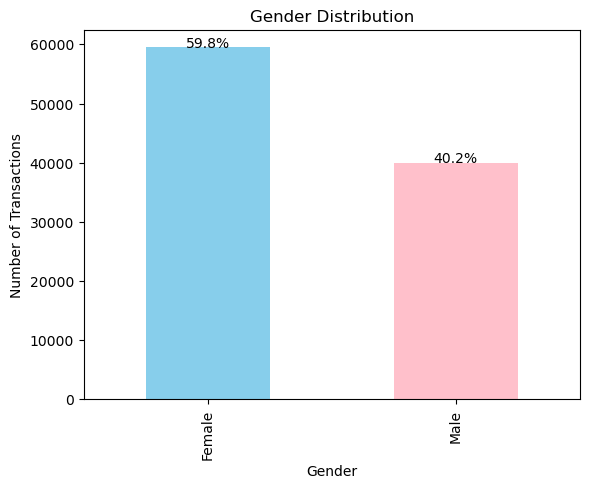

In [53]:
import matplotlib.pyplot as plt

# Calculating gender distribution and percentages
gender_distribution = data['gender'].value_counts()
total = gender_distribution.sum()
percentages = (gender_distribution / total) * 100

# Ploting bar chart
ax = gender_distribution.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')

# Annotating bars with percentages
for idx, value in enumerate(gender_distribution):
    percentage = f"{percentages[idx]:.1f}%"
    ax.text(idx, value + 0.5, percentage, ha='center', fontsize=10)

plt.show()


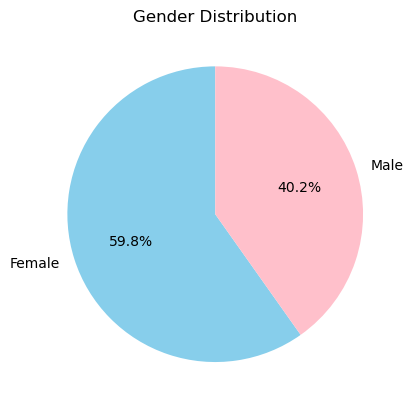

In [55]:
# Calculating gender distribution
gender_distribution = data['gender'].value_counts()

# Plot pie chart
gender_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'pink'],
    startangle=90,
    ylabel=''  # Remove y-axis label for aesthetics
)
plt.title('Gender Distribution')
plt.show()


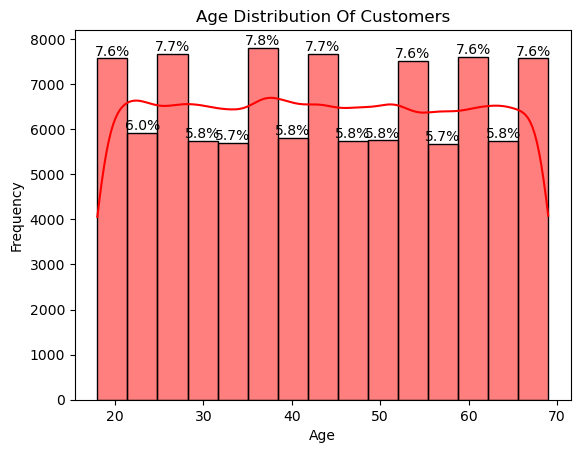

In [73]:

# Ploting the histogram
ax = sns.histplot(data['age'], bins=15, kde=True, color='red')

# Calculating the total number of values
total = len(data['age'])

# Annotating each bin with percentage values
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x_position = patch.get_x() + width / 2
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (x_position, height), 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='black')

plt.title('Age Distribution Of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


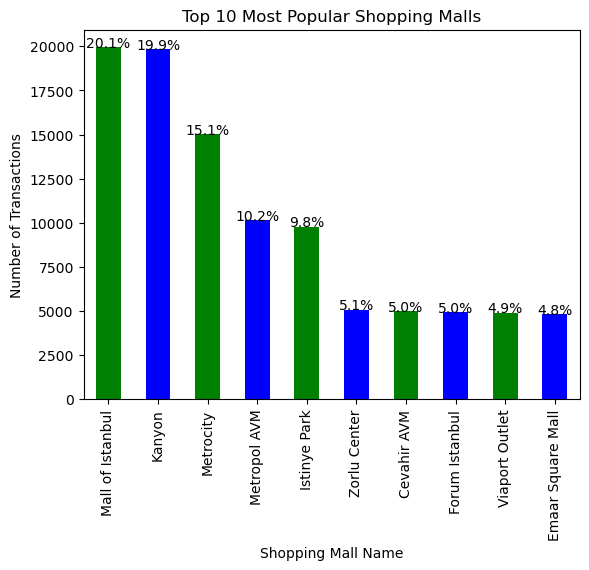

In [82]:
# Calculating mall distribution and get the top 10 malls
mall_distribution = data['shopping_mall'].value_counts()
top_malls = mall_distribution.head(10)

# Ploting the bar chart
ax = top_malls.plot(kind='bar', color=['green', 'blue'])

# Calculate total transactions
total = top_malls.sum()

# Annotating each bar with percentage values
for idx, value in enumerate(top_malls):
    percentage = (value / total) * 100
    ax.text(idx, value + 0.5, f'{percentage:.1f}%', ha='center', fontsize=10)

# Adding titles and labels
plt.title('Top 10 Most Popular Shopping Malls')
plt.xlabel('Shopping Mall Name')
plt.ylabel('Number of Transactions')
plt.show()


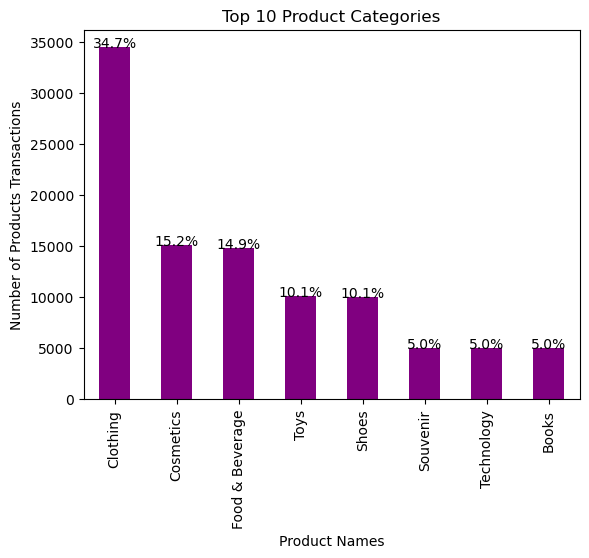

In [77]:

# Calculating product category distribution and get the top 10 categories
product_cate = data['category'].value_counts()
top_categories = product_cate.head(10)

# Ploting the bar chart
ax = top_categories.plot(kind='bar', color='purple')

# Calculate total number of transactions
total = top_categories.sum()

# Annotating each bar with percentage values
for idx, value in enumerate(top_categories):
    percentage = (value / total) * 100
    ax.text(idx, value + 0.5, f'{percentage:.1f}%', ha='center', fontsize=10)

# Adding titles and labels
plt.title('Top 10 Product Categories')
plt.xlabel('Product Names')
plt.ylabel('Number of Products Transactions')
plt.show()


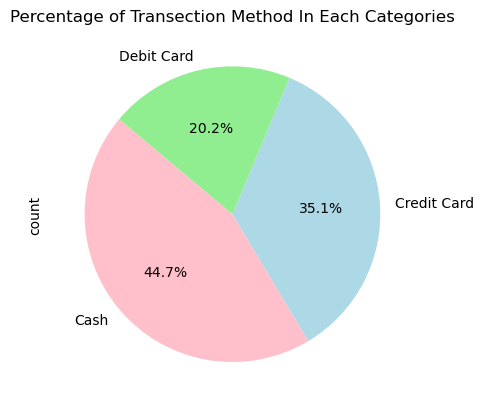

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [15]:
# Visualize payment methods with a pie chart

pmd=data['payment_method'].value_counts()
pmd.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'lightblue', 'lightgreen'])
plt.title('Percentage of Transection Method In Each Categories')
plt.show()
pmd

In [16]:
# Creating New column Total_Price
data['total_price'] = data['quantity'] * data['price']

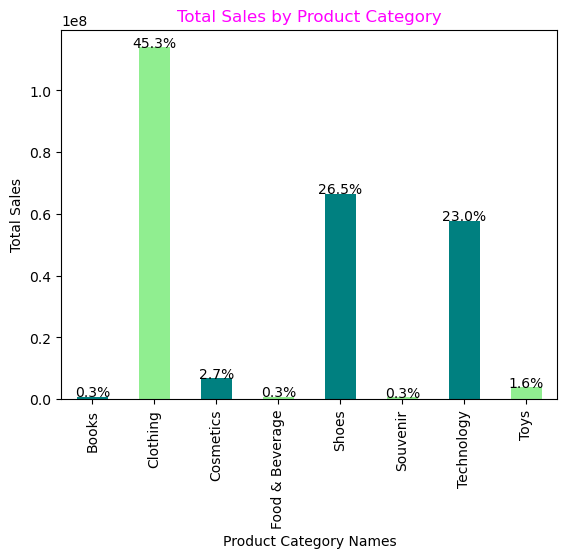

In [79]:
# Grouping by category and sum up the total sales
sbc = data.groupby('category')['total_price'].sum()

# Calculating the total sales
total_sales = sbc.sum()

# Ploting the bar chart
ax = sbc.plot(kind="bar", color=["teal", "lightgreen"])

# Annotating each bar with percentage values
for idx, value in enumerate(sbc):
    percentage = (value / total_sales) * 100
    ax.text(idx, value + 0.5, f'{percentage:.1f}%', ha='center', fontsize=10)

# Adding title and axis labels
plt.title('Total Sales by Product Category', color='Magenta')
plt.xlabel('Product Category Names')
plt.ylabel('Total Sales')
plt.show()


In [18]:
#Convert invoice_date to datetime
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%m-%Y')

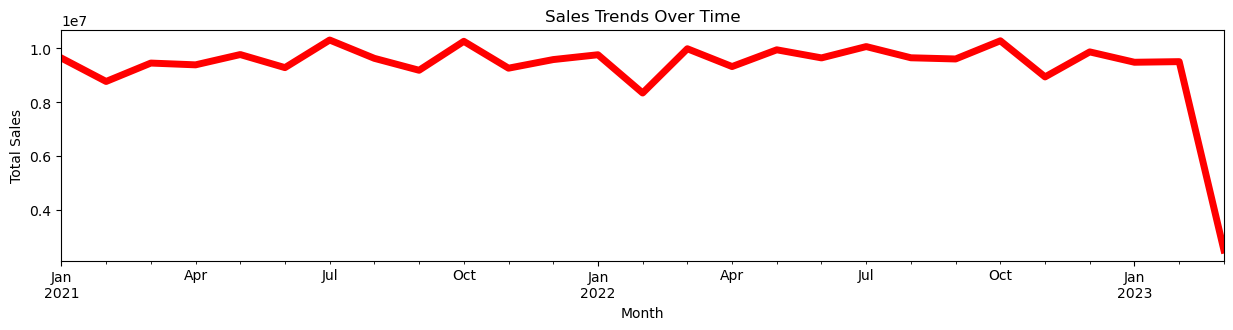

In [19]:
# Analyzing Sales Trends Over Time
plt.figure(figsize=(15,3))
sales_trends = data.groupby(data['invoice_date'].dt.to_period('M'))['total_price'].sum()
sales_trends.plot(color='red', linewidth=5)
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

## Perform Market Basket Analysis-Identify the categories that are frequently purchased together.
   a. Identify upselling and cross selling opportunities as well

### Data Preparation
    We need to identify all categories purchased together in each transaction (invoice_no).

In [22]:
# Group data by invoice_no and collect categories for each transaction
transactions = data.groupby('invoice_no')['category'].apply(list)

# Display a few transactions
print(transactions.head())


invoice_no
I100008      [Clothing]
I100014     [Cosmetics]
I100015      [Clothing]
I100024         [Books]
I100027    [Technology]
Name: category, dtype: object


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
# Create a pivot table where rows are invoice numbers and columns are categories
basket_matrix = data.pivot_table(index='invoice_no', columns='category', values='quantity', aggfunc='sum', fill_value=0)

# Display the first few rows of the basket matrix
print(basket_matrix.head())

category    Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
invoice_no                                                                 
I100008         0         5          0                0      0         0   
I100014         0         0          5                0      0         0   
I100015         0         2          0                0      0         0   
I100024         3         0          0                0      0         0   
I100027         0         0          0                0      0         0   

category    Technology  Toys  
invoice_no                    
I100008              0     0  
I100014              0     0  
I100015              0     0  
I100024              0     0  
I100027              4     0  


## Compute Co-occurrence Matrix
    Calculate the pairwise co-occurrence of categories using matrix multiplication.

In [26]:
# Compute the co-occurrence matrix
co_occurrence_matrix = np.dot(basket_matrix.T, basket_matrix)

# Convert the matrix to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=basket_matrix.columns, columns=basket_matrix.columns)

# Set diagonal to 0 to avoid self-pairs
np.fill_diagonal(co_occurrence_matrix, 0)

# Display the co-occurrence matrix
print(co_occurrence_df)


category         Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
category                                                                        
Books                0         0          0                0      0         0   
Clothing             0         0          0                0      0         0   
Cosmetics            0         0          0                0      0         0   
Food & Beverage      0         0          0                0      0         0   
Shoes                0         0          0                0      0         0   
Souvenir             0         0          0                0      0         0   
Technology           0         0          0                0      0         0   
Toys                 0         0          0                0      0         0   

category         Technology  Toys  
category                           
Books                     0     0  
Clothing                  0     0  
Cosmetics                 0     0  
Food & Be

## Visualize Co-occurrence
    Use a heatmap to visualize frequently co-purchased categories.

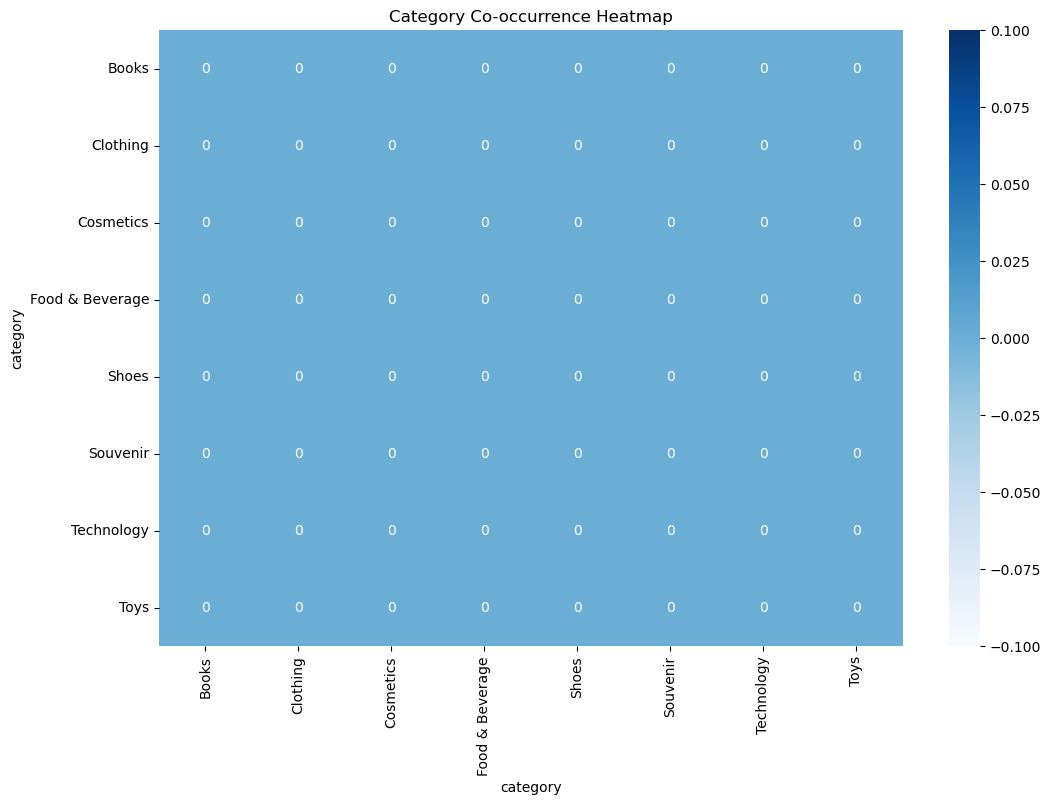

In [28]:
# Plot heatmap of the co-occurrence matrix
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_df, annot=True, fmt='.0f', cmap='Blues')
plt.title('Category Co-occurrence Heatmap')
plt.show()


# 3. Predict the most likely categories that each of this customer might purchase

In [32]:
# Create a pivot table of customers and categories
customer_category_matrix = data.pivot_table(
    index='customer_id', 
    columns='category', 
    values='quantity', 
    aggfunc='sum', 
    fill_value=0
)

# Display the first few rows of the customer-category matrix
print(customer_category_matrix.head())


category     Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
customer_id                                                                 
C100004          0         5          0                0      0         0   
C100005          0         0          0                0      2         0   
C100006          0         0          0                0      0         0   
C100012          0         0          0                5      0         0   
C100019          0         0          0                0      0         0   

category     Technology  Toys  
customer_id                    
C100004               0     0  
C100005               0     0  
C100006               0     3  
C100012               0     0  
C100019               0     1  


In [36]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Convert customer-category matrix to a sparse matrix
sparse_matrix = csr_matrix(customer_category_matrix)

# Check the size of the sparse matrix
print(f"Sparse matrix memory usage: {sparse_matrix.data.nbytes / 1024**2:.2f} MB")


Sparse matrix memory usage: 0.76 MB


In [40]:
def compute_customer_similarity(customer_index, sparse_matrix, top_n=5):
    # Compute similarities for the given customer
    customer_vector = sparse_matrix[customer_index]
    similarity_scores = cosine_similarity(customer_vector, sparse_matrix)
    
    # Get top N similar customers
    top_similar_indices = similarity_scores[0].argsort()[-top_n - 1:-1][::-1]
    top_similar_scores = similarity_scores[0][top_similar_indices]
    
    return top_similar_indices, top_similar_scores


# Generating Recommendations
    Use the top similar customers to recommend categories.

In [42]:
def recommend_categories(customer_id, customer_category_matrix, sparse_matrix, top_n=5):
    customer_index = list(customer_category_matrix.index).index(customer_id)
    top_indices, _ = compute_customer_similarity(customer_index, sparse_matrix, top_n)
    
    # Aggregate purchases of top similar customers
    similar_customers = customer_category_matrix.iloc[top_indices]
    aggregated_purchases = similar_customers.sum(axis=0)
    
    # Exclude categories the customer has already purchased
    customer_purchases = customer_category_matrix.iloc[customer_index]
    recommendations = aggregated_purchases[customer_purchases == 0].sort_values(ascending=False)
    
    return recommendations.index.tolist()

# Example usage
example_customer_id = customer_category_matrix.index[0]
recommendations = recommend_categories(example_customer_id, customer_category_matrix, sparse_matrix)
print(f"Recommended categories for Customer {example_customer_id}: {recommendations}")


Recommended categories for Customer C100004: ['Books', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys']


In [63]:
data['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64